In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('us-states.csv')

df2=pd.read_csv('vax_data.csv')

In [3]:
df3 = pd.read_csv('2021_US_Region_Mobility_Report.csv')

In [4]:
df.columns

df2.columns

df3.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [5]:
ca_df = df[df['state']=='California'].copy()

ca_df2 = df2[df2['Location']=='CA'].copy()


In [6]:
#filtered_vals=np.where(df3['sub_region_1']=='California' & df3['sub_region_2'].isnull())

ca_df3a=df3[df3['sub_region_1']=='California'].copy()

ca_df3=ca_df3a[ca_df3a['sub_region_2'].isnull()].copy()

In [7]:
ca_df.shape

ca_df.head()

#min(ca_df['date'])
#print(ca_df.date.min())

,date,state,fips,cases,deaths
5,1/25/2020,California,6,1,0
9,1/26/2020,California,6,2,0
13,1/27/2020,California,6,2,0
17,1/28/2020,California,6,2,0
21,1/29/2020,California,6,2,0


In [8]:
ca_df2.shape

ca_df2.head()

#min(ca_df2['Date'])

#print(ca_df2.Date.min())

,Date,MMWR_week,Location,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,Administered_Dose1_Pop_Pct,...,Administered_daily_change_report,Administered_daily_change_report_7dayroll,Series_Complete_Daily,Series_Complete_Cumulative,Series_Complete_Day_Rolling_Average,Series_Complete_Pop_Pct,Booster_Daily,Booster_Cumulative,Booster_7_Day_Rolling_Average,Additional_Doses_Vax_Pct
17,04/20/2022,16,CA,68591,74358164,98964,8660,32959251,22191,83.4,...,68591,98964,6491,28383453,16613,71.8,13111,14303227,19443,50.4
107,04/19/2022,16,CA,18635,74289573,110144,3174,32950591,27239,83.4,...,18635,110144,2180,28376962,20147,71.8,4178,14290116,22901,50.4
179,04/19/2022,16,CA,1,74358164,44803,16,32959251,4954,83.4,...,1,44803,10,28383453,3963,71.8,4,14303227,9014,50.4
180,04/18/2022,16,CA,49004,74358163,55670,4569,32959235,6253,83.4,...,49004,55670,3734,28383443,4844,71.8,9359,14303223,11055,50.4
232,04/18/2022,16,CA,38343,74270938,120874,4595,32947417,30934,83.4,...,38343,120874,4280,28374782,23264,71.8,8221,14285938,25502,50.3


In [9]:
ca_df3.shape

ca_df3.head()

#min(ca_df2['Date'])

#print(ca_df2.Date.min())

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
56472,US,United States,California,NaN,NaN,US-CA,NaN,ChIJPV4oX_65j4ARVW8IJ6IJUYs,2021-01-01,-52.0,-36.0,-11.0,-68.0,-78.0,28.0
56473,US,United States,California,NaN,NaN,US-CA,NaN,ChIJPV4oX_65j4ARVW8IJ6IJUYs,2021-01-02,-38.0,-18.0,-32.0,-47.0,-30.0,13.0
56474,US,United States,California,NaN,NaN,US-CA,NaN,ChIJPV4oX_65j4ARVW8IJ6IJUYs,2021-01-03,-37.0,-20.0,-25.0,-44.0,-23.0,10.0
56475,US,United States,California,NaN,NaN,US-CA,NaN,ChIJPV4oX_65j4ARVW8IJ6IJUYs,2021-01-04,-31.0,-15.0,-34.0,-50.0,-45.0,16.0
56476,US,United States,California,NaN,NaN,US-CA,NaN,ChIJPV4oX_65j4ARVW8IJ6IJUYs,2021-01-05,-32.0,-12.0,-24.0,-50.0,-45.0,16.0


In [10]:
ca_df3.drop(ca_df3.iloc[:, [0, 1,2,3,4,5,6,7]], axis=1)

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
56472,2021-01-01,-52.0,-36.0,-11.0,-68.0,-78.0,28.0
56473,2021-01-02,-38.0,-18.0,-32.0,-47.0,-30.0,13.0
56474,2021-01-03,-37.0,-20.0,-25.0,-44.0,-23.0,10.0
56475,2021-01-04,-31.0,-15.0,-34.0,-50.0,-45.0,16.0
56476,2021-01-05,-32.0,-12.0,-24.0,-50.0,-45.0,16.0
...,...,...,...,...,...,...,...
56832,2021-12-27,-15.0,-12.0,-32.0,-43.0,-52.0,14.0
56833,2021-12-28,-13.0,-6.0,-21.0,-40.0,-49.0,13.0
56834,2021-12-29,-18.0,-9.0,-42.0,-45.0,-50.0,15.0
56835,2021-12-30,-14.0,-1.0,-31.0,-45.0,-53.0,15.0


In [16]:
ca_df2 = ca_df2[ca_df2['date_type']=='Admin'].copy()

In [17]:
ca_df3['date'] = pd.to_datetime(ca_df3['date'])


In [18]:
ca_df['date'] = pd.to_datetime(ca_df['date'])


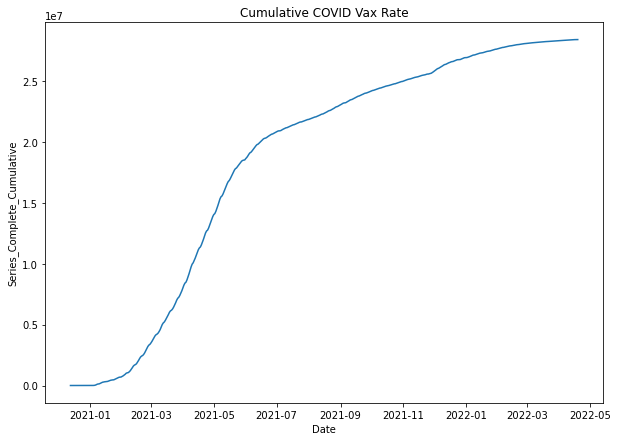

In [19]:
ca_df2['Date'] = pd.to_datetime(ca_df2['Date'])


fig, ax = plt.subplots(figsize=(10, 7))

p = sns.lineplot(x='Date', y='Series_Complete_Cumulative', data=ca_df2)
p.set(title="Cumulative COVID Vax Rate")
plt.show()

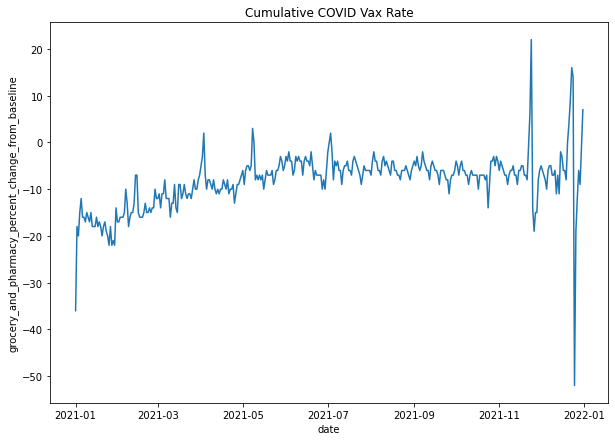

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))

p = sns.lineplot(x='date', y='grocery_and_pharmacy_percent_change_from_baseline', data=ca_df3)
p.set(title="Cumulative COVID Vax Rate")
plt.show()

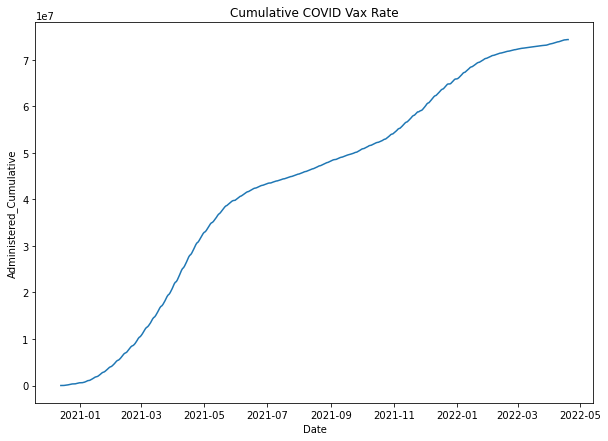

In [21]:
#ca_df2['Date'] = pd.to_datetime(ca_df2['Date'])


fig, ax = plt.subplots(figsize=(10, 7))

p = sns.lineplot(x='Date', y='Administered_Cumulative', data=ca_df2)
p.set(title="Cumulative COVID Vax Rate")
plt.show()

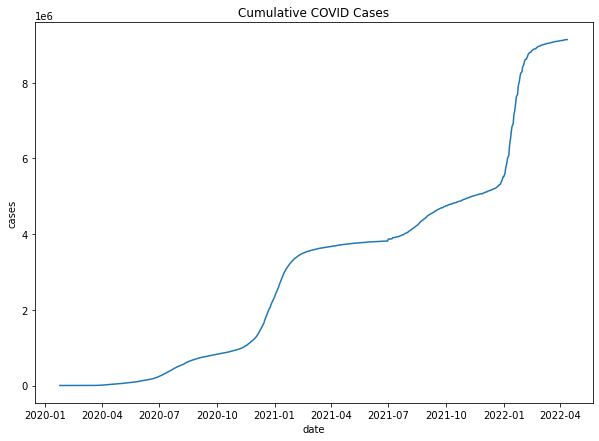

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))

p = sns.lineplot(x='date', y='cases', data=ca_df)
p.set(title="Cumulative COVID Cases")
plt.show()

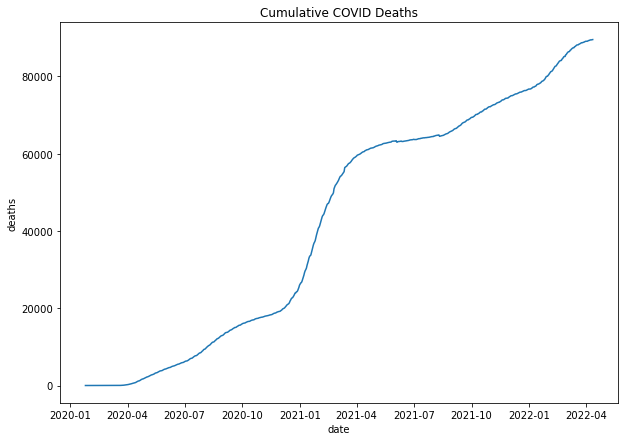

In [23]:
fig, ax = plt.subplots(figsize=(10, 7))

p = sns.lineplot(x='date', y='deaths', data=ca_df)
p.set(title="Cumulative COVID Deaths")
plt.show()

In [24]:
# assuming 2 week recovery
ca_df['recovered'] = ca_df.sort_values(by='date')['cases'].shift(14)

In [25]:
ca_df['recovered'].fillna(0, inplace=True)

ca_df.head()

,date,state,fips,cases,deaths,recovered
5,2020-01-25,California,6,1,0,0.0
9,2020-01-26,California,6,2,0,0.0
13,2020-01-27,California,6,2,0,0.0
17,2020-01-28,California,6,2,0,0.0
21,2020-01-29,California,6,2,0,0.0


In [26]:
# total CA population, 2020
tot_pop = 39538223

ca_df['susceptible'] = tot_pop - ca_df['recovered']

ca_df['infected'] = ca_df['cases'] - ca_df['recovered']

ca_df.head()

,date,state,fips,cases,deaths,recovered,susceptible,infected
5,2020-01-25,California,6,1,0,0.0,39538223.0,1.0
9,2020-01-26,California,6,2,0,0.0,39538223.0,2.0
13,2020-01-27,California,6,2,0,0.0,39538223.0,2.0
17,2020-01-28,California,6,2,0,0.0,39538223.0,2.0
21,2020-01-29,California,6,2,0,0.0,39538223.0,2.0


In [27]:

ca_df2=ca_df2.drop(ca_df2.columns[[1, 13,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20]], axis=1)

In [28]:
ca_df2.rename({'Date': 'date', 'Location': 'state','Administered_Daily':'Daily_vax_dose','Series_Complete_Cumulative': 'Full_vax'}, axis=1, inplace=True)

In [29]:
ca_df2


,date,state,Daily_vax_dose,Full_vax
179,2022-04-19,CA,1,28383453
180,2022-04-18,CA,49004,28383443
309,2022-04-17,CA,7510,28379709
427,2022-04-16,CA,34860,28378894
553,2022-04-15,CA,79056,28375495
...,...,...,...,...
58680,2020-12-17,CA,30359,1254
58816,2020-12-16,CA,10109,1194
58948,2020-12-15,CA,1349,1169
59069,2020-12-14,CA,69,1134


In [30]:
merged_data=pd.merge(ca_df,ca_df2,how='left',on='date')

In [31]:
merged_data

,date,state_x,fips,cases,deaths,recovered,susceptible,infected,state_y,Daily_vax_dose,Full_vax
0,2020-01-25,California,6,1,0,0.0,39538223.0,1.0,NaN,NaN,NaN
1,2020-01-26,California,6,2,0,0.0,39538223.0,2.0,NaN,NaN,NaN
2,2020-01-27,California,6,2,0,0.0,39538223.0,2.0,NaN,NaN,NaN
3,2020-01-28,California,6,2,0,0.0,39538223.0,2.0,NaN,NaN,NaN
4,2020-01-29,California,6,2,0,0.0,39538223.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
804,2022-04-08,California,6,9132016,89426,9087644.0,30450579.0,44372.0,CA,85222.0,28337202.0
805,2022-04-09,California,6,9132019,89429,9088616.0,30449607.0,43403.0,CA,41514.0,28341188.0
806,2022-04-10,California,6,9132019,89438,9088616.0,30449607.0,43403.0,CA,23017.0,28343396.0
807,2022-04-11,California,6,9134794,89484,9094047.0,30444176.0,40747.0,CA,73010.0,28349538.0


In [42]:
merged_data2=pd.merge(merged_data,ca_df3,how='left',on='date')

In [43]:
merged_data2

,date,state_x,fips,cases,deaths,recovered,susceptible,infected,state_y,Daily_vax_dose,...,metro_area,iso_3166_2_code,census_fips_code,place_id,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-01-25,California,6,1,0,0.0,39538223.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-26,California,6,2,0,0.0,39538223.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-27,California,6,2,0,0.0,39538223.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-28,California,6,2,0,0.0,39538223.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-29,California,6,2,0,0.0,39538223.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,2022-04-08,California,6,9132016,89426,9087644.0,30450579.0,44372.0,CA,85222.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,2022-04-09,California,6,9132019,89429,9088616.0,30449607.0,43403.0,CA,41514.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
806,2022-04-10,California,6,9132019,89438,9088616.0,30449607.0,43403.0,CA,23017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,2022-04-11,California,6,9134794,89484,9094047.0,30444176.0,40747.0,CA,73010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_long = merged_data[['date', 'recovered', 'infected', 'susceptible','Daily_vax_dose','Full_vax']].melt('date', var_name='status', value_name='num_cases')
merged_long.head()

In [ ]:
ca_long = ca_df[['date', 'recovered', 'infected', 'susceptible']].melt('date', var_name='status', value_name='num_cases')
ca_long.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

p = sns.lineplot(x='date', y='num_cases', hue='status', data=ca_long)
p.set(title="Number of COVID Cases by Status")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

max_y = max(ca_long[ca_long['status']=='infected']['num_cases'])

p = sns.lineplot(x='date', y='num_cases', data=ca_long[ca_long['status']=='infected'])
p.set(title="Number of COVID Infections (estimated)")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

p = sns.lineplot(x='date', y='num_cases', hue='status', data=merged_long)
p.set(title="Number of COVID Cases by Status")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

clist = ['Daily_vax_dose','infected']

p = sns.lineplot(x='date', y='num_cases', hue='status',data=merged_long[merged_long['status'].isin(clist)])
p.set(title="Number of Full Vaccinations")

plt.show()

In [44]:
ca_infected = merged_data['infected'].values
ca_recovered= merged_data['recovered'].values
ca_vax= merged_data['Full_vax'].values
ca_vaxd= merged_data['Daily_vax_dose'].values
ca_grocery= merged_data2['grocery_and_pharmacy_percent_change_from_baseline'].values
ca_death= merged_data['deaths'].values

# Simulation


In [32]:
# Initial number of infections and recovered individuals
I0, R0 = 1, 0

# Total California population (2020 census)
N = tot_pop
N_total = N

# Number of susceptible individuals
S0 = N - R0

# Assume recovery time of 14 days
gamma = 1./14

# Observation timeline
t = np.linspace(0, len(ca_df)-1, len(ca_df))

In [33]:
# initial conditions vector
y0 = S0, I0, R0

## Time-Dependent R_0


In [34]:
# The SIR model differential equations.
def deriv_dynamic(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta(t) * S * I / N
    dIdt = beta(t) * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [35]:
def R_0_dynamic(t):
    value = None
    for i in range(len(epochs)):
        if t >= epochs[i]:
            value = logistic_R_0(t, k[i], x[i], R_0[i],  R_0[i+1])
    return value

def logistic_R_0(t, k, x, start, end):
    return (start - end) / (1 + np.exp(-k * (-t + x))) + end

def beta_dynamic(t):
    return R_0_dynamic(t) * gamma

In [36]:
def abse(pred, true):
    sum = 0
    for i in range(len(true)):
       sum += abs(true[i] - pred[i]) 
    
    return sum / len(true)

def rmse(pred, true):
    sum = 0
    for i in range(len(true)):
        sum += math.pow(true[i] - pred[i], 2)
    
    return math.sqrt(sum / len(true))

### Minimizing MAE

In [37]:
# Define epoch start dates
epochs = [0, 97, 250, 330, 360,430, 550, 680, 725]

In [38]:
# R0 values for each epoch
R_0 = [0.5, 1.24, 2.62, 1.77, 0.51,0.52, 1.71, 0.89, 3.2, 0.8]

# k and x values for smooth R0 transition function
k = [0.3, 0.07, 0.08, 0.09, 0.1,0.1, 0.5, 0.1, 0.38]
x = [60, 175, 265, 343,400 ,495, 576, 675, 730]

In [39]:
ret = odeint(deriv_dynamic, y0, t, args = (N, beta_dynamic, gamma))
S, I, R = ret.T

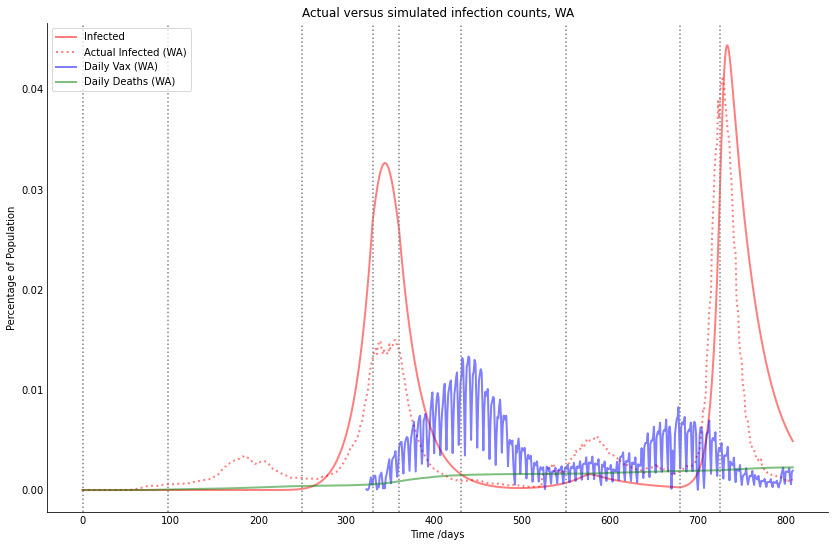

In [47]:
# Plot the data on predicted and actual infections 

fig, ax = plt.subplots(facecolor='w', figsize = (14, 9))

ax.plot(t, I/N_total, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, ca_infected/N_total, 'r:', alpha=0.5, lw=2, label='Actual Infected (WA)')
ax.plot(t, ca_vaxd/N_total, 'b', alpha=0.5, lw=2, label='Daily Vax (WA)')
ax.plot(t, ca_death/N_total, 'g', alpha=0.5, lw=2, label='Daily Deaths (WA)')
ax.set_xlabel('Time /days')
ax.set_ylabel('Percentage of Population')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.set_ylim(-0.5,0.5)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for e in epochs:
    plt.axvline(x=e, color="grey", linestyle=':')
legend = ax.legend()
legend.get_frame().set_alpha(0.75)
for spine in ('top', 'right'):#, 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
plt.title("Actual versus simulated infection counts, WA")
plt.show()

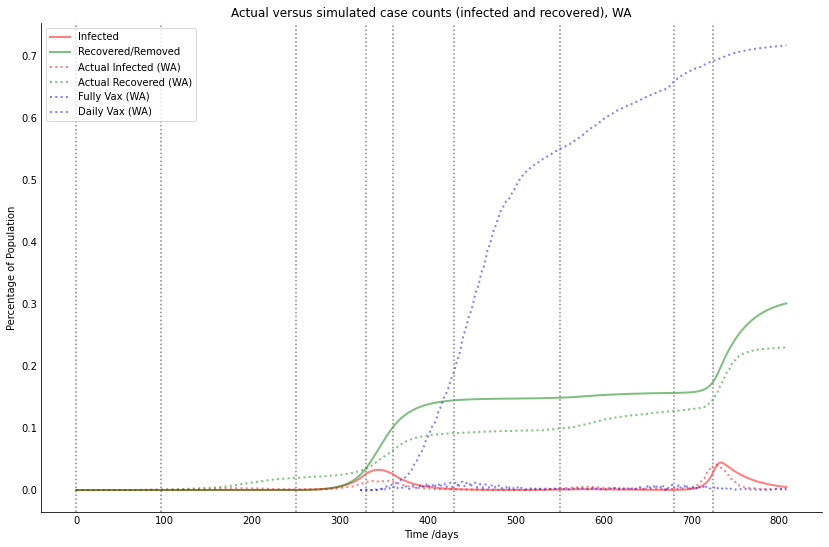

In [48]:
# Plot the data for predicted and actual infections and recoveries

fig, ax = plt.subplots(facecolor='w', figsize = (14, 9))

ax.plot(t, I/N_total, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N_total, 'g', alpha=0.5, lw=2, label='Recovered/Removed')
ax.plot(t, ca_infected/N_total, 'r:', alpha=0.5, lw=2, label='Actual Infected (WA)')
ax.plot(t, ca_recovered/N_total, 'g:', alpha=0.5, lw=2, label='Actual Recovered (WA)')
ax.plot(t, ca_vax/N_total, 'b:', alpha=0.5, lw=2, label='Fully Vax (WA)')
ax.plot(t, ca_vaxd/N_total, 'b:', alpha=0.5, lw=2, label='Daily Vax (WA)')
ax.set_xlabel('Time /days')
ax.set_ylabel('Percentage of Population')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for e in epochs:
    plt.axvline(x=e, color="grey", linestyle=':')
legend = ax.legend()
legend.get_frame().set_alpha(0.75)
for spine in ('top', 'right'):#, 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
plt.title("Actual versus simulated case counts (infected and recovered), WA")
plt.show()

In [ ]:
print(f"Abolute Error: {mean_absolute_error(wa_infected, I)}")